# Mini Project 2

In [ ]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from scipy.optimize import curve_fit
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
# Read the datasets
file_paths = {
    "global_temperature": "/content/sample_data/1850-2024.csv",
    "co2_emissions": "/content/sample_data/annual-co2-emissions-per-country.csv",
    "mauna_loa_co2": "/content/sample_data/co2_annmean_mlo.csv",
    "long_term_co2": "/content/sample_data/co2-long-term-concentration.csv"
}

temperature_df = pd.read_csv(file_paths["global_temperature"], comment='#')
co2_emissions_df = pd.read_csv(file_paths["co2_emissions"])
long_term_co2_df = pd.read_csv(file_paths["long_term_co2"])
# mauna_loa_co2_df = pd.read_csv(file_paths["mauna_loa_co2"], comment='#')

In [ ]:
temperature_df.head()

Year  Anomaly
0  1850    -0.20
1  1851    -0.09
2  1852    -0.05
3  1853    -0.11
4  1854    -0.07

In [ ]:
co2_emissions_df.head()

Entity      Code  Year  Annual CO‚ÇÇ emissions
0  World  OWID_WRL  1750               9305937
1  World  OWID_WRL  1751               9407229
2  World  OWID_WRL  1752               9505168
3  World  OWID_WRL  1753               9610490
4  World  OWID_WRL  1754               9733580

In [ ]:
long_term_co2_df.head()

Entity      Code    Year  Long-run CO‚ÇÇ concentration
0  World  OWID_WRL -803719                   207.28545
1  World  OWID_WRL -803182                   202.22684
2  World  OWID_WRL -802573                   204.86194
3  World  OWID_WRL -802060                   207.49864
4  World  OWID_WRL -801975                   202.92172

#EDA

####Check for null values

In [ ]:
def check_null_values(df):
    null_counts = df.isnull().sum()
    return print(f"No. of null values :\n{null_counts}\n")

check_null_values(temperature_df)
check_null_values(co2_emissions_df)
check_null_values(long_term_co2_df)

No. of null values :
Year       0
Anomaly    0
dtype: int64

No. of null values :
Entity                  0
Code                    0
Year                    0
Annual CO‚ÇÇ emissions    0
dtype: int64

No. of null values :
Entity                        0
Code                          0
Year                          0
Long-run CO‚ÇÇ concentration    0
dtype: int64



####Visualising trends in data

1. Global Temperature Anomalies Over Time

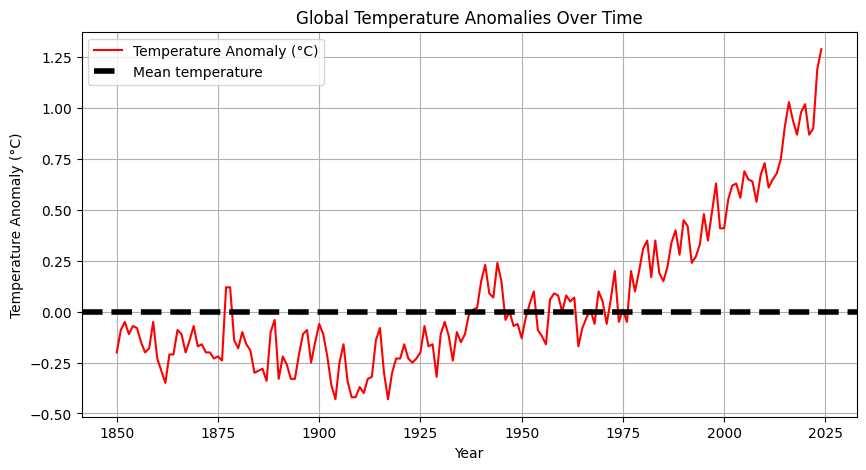

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(temperature_df["Year"], temperature_df["Anomaly"], color="red", label="Temperature Anomaly (¬∞C)")
plt.axhline(y=0, color='black', linestyle='--',linewidth=4, label='Mean temperature')
plt.xlabel("Year")
plt.ylabel("Temperature Anomaly (¬∞C)")
plt.title("Global Temperature Anomalies Over Time")
plt.legend()
plt.grid(True)
plt.show()

2. Annual CO‚ÇÇ Emissions Over Time

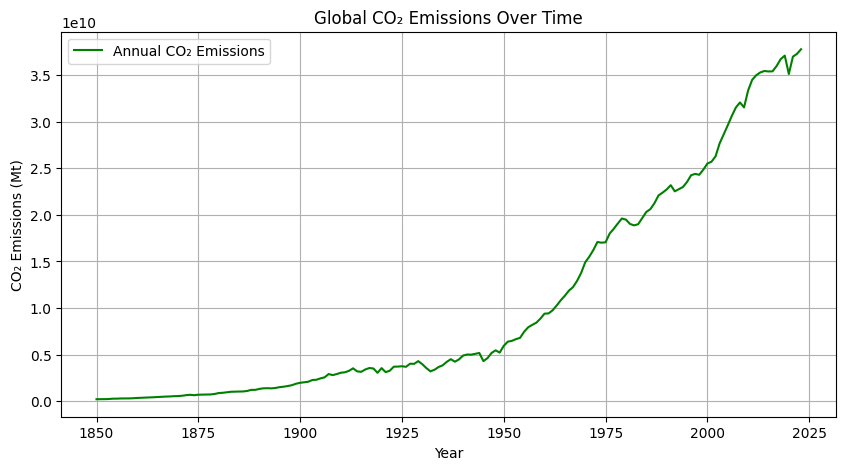

In [ ]:
year_filter_co2emissions = co2_emissions_df["Year"] >= 1850
co2_emissions_df_filtered = co2_emissions_df[year_filter_co2emissions]
plt.figure(figsize=(10, 5))
plt.plot(co2_emissions_df_filtered["Year"], co2_emissions_df_filtered["Annual CO‚ÇÇ emissions"], label="Annual CO‚ÇÇ Emissions", color="green")
plt.xlabel("Year")
plt.ylabel("CO‚ÇÇ Emissions (Mt)")
plt.title("Global CO‚ÇÇ Emissions Over Time")
plt.legend()
plt.grid(True)
plt.show()

3. CO‚ÇÇ Concentration Over Time (Long-Term)

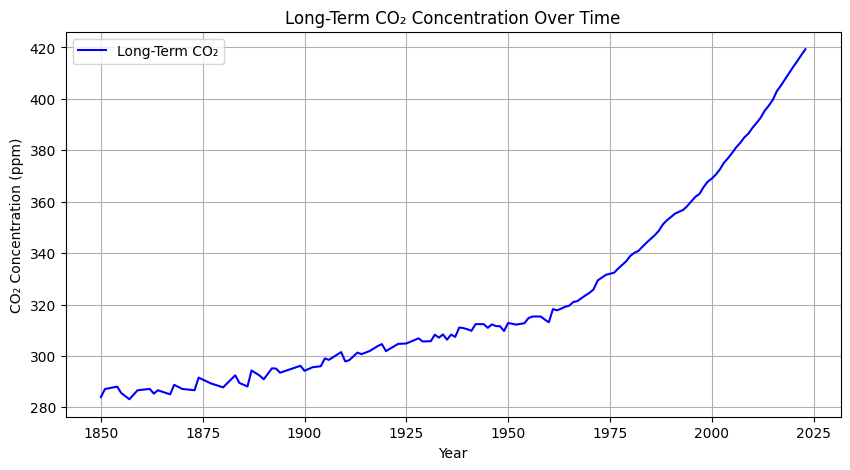

In [ ]:
year_filter_longtermco2 = long_term_co2_df["Year"] >= 1850
long_term_co2_df_filtered = long_term_co2_df[year_filter_longtermco2]
plt.figure(figsize=(10, 5))
plt.plot(long_term_co2_df_filtered["Year"], long_term_co2_df_filtered["Long-run CO‚ÇÇ concentration"], label="Long-Term CO‚ÇÇ", color="blue")
plt.xlabel("Year")
plt.ylabel("CO‚ÇÇ Concentration (ppm)")
plt.title("Long-Term CO‚ÇÇ Concentration Over Time")
plt.legend()
plt.grid(True)
plt.show()

####Calculate correlation

In [ ]:
# Merge data
merged_df = temperature_df.merge(co2_emissions_df, on="Year", how="left").merge(long_term_co2_df, on="Year", how="left")
merged_df.dropna(subset=["Anomaly", "Annual CO‚ÇÇ emissions", "Long-run CO‚ÇÇ concentration"], inplace=True)

# Drop unnecessary columns
merged_df.drop(columns=["Entity_x", "Code_x", "Entity_y", "Code_y"], inplace=True)

# Convert Year to index for time series analysis
merged_df.set_index("Year", inplace=True)
merged_df.index = pd.to_datetime(merged_df.index, format='%Y')

merged_df.head()

Anomaly  Annual CO‚ÇÇ emissions  Long-run CO‚ÇÇ concentration
Year                                                                 
1850-01-01    -0.20           196847600.0                   284.00165
1851-01-01    -0.09           198778540.0                   287.12810
1854-01-01    -0.07           255038560.0                   288.05444
1855-01-01    -0.08           260259860.0                   285.56558
1857-01-01    -0.20           281181060.0                   283.16210

<Figure size 640x480 with 0 Axes>

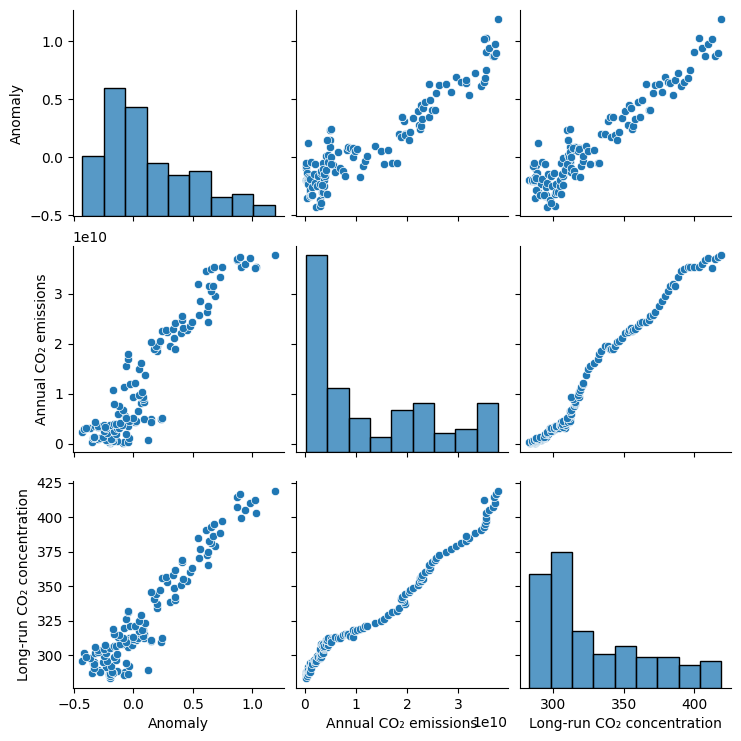

In [ ]:
# Pair plot
plt.figure()
sns.pairplot(merged_df)
plt.show()

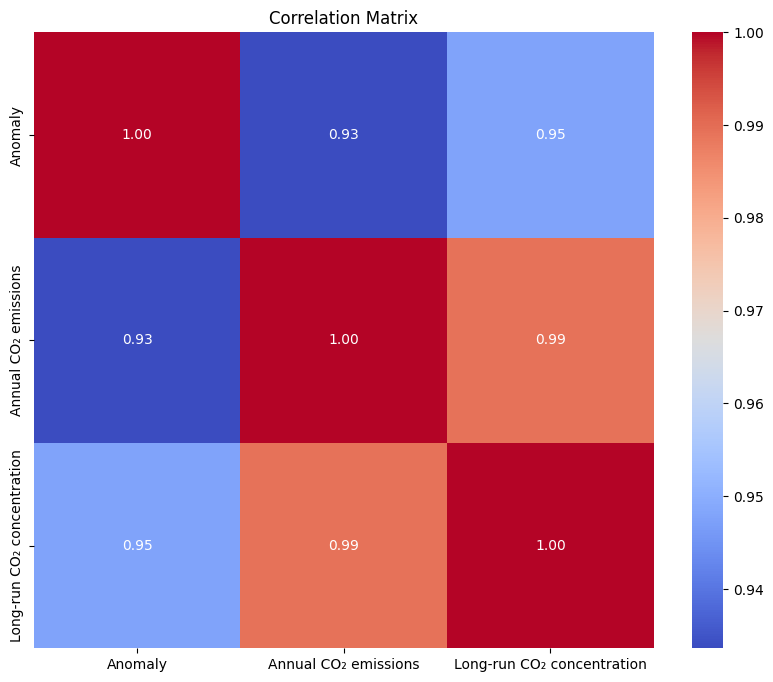

In [ ]:
# Correlation plot
correlation_matrix = merged_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm" ,fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

EDA Visualizations & Insights

Global Temperature Anomalies Over Time
* The temperature anomaly trend shows a significant increase after 1950
* The sharpest rise has occurred in the past 50 years, aligning with industrial expansion.
* Recent years (2000‚Äìpresent) have recorded the highest temperature anomalies.

Long-Term CO‚ÇÇ Concentration Trends
*   CO‚ÇÇ concentration levels remained stable for thousands of years until the Industrial Revolution (~1750).
*   The steepest CO‚ÇÇ rise has occurred in the past century.
*   CO‚ÇÇ levels now exceed 400 ppm, which is far beyond pre-industrial levels.

Global CO‚ÇÇ Emissions Trends

*  CO‚ÇÇ emissions were nearly zero before 1750, confirming human-induced emissions.
*  There is a rapid increase in emissions post-1950, aligning with fossil fuel combustion and industrial growth.
*  The highest emissions are recorded in the 21st century, reinforcing human influence on climate change.


Key Takeaways from EDA
*   There is a clear correlation between CO‚ÇÇ increase and temperature rise.
*   Temperature anomalies show an accelerated rise post-1950, matching CO‚ÇÇ trends.
*   Human activities (fossil fuel combustion) are strongly linked to increasing CO‚ÇÇ levels
*   There is a strong correlation between CO‚ÇÇ emissions and long-term CO‚ÇÇ concentration levels, indicating that they are not independent of each other. Therefore, only the CO‚ÇÇ emissions is selected as the feature in the model.

# Linear Regression Model using only Anthropogenic CO‚ÇÇ Emissions

Regression Equation: Temperature Anomaly (¬∞C) = 2.9270e-08 * Anthropogenic CO‚ÇÇ Emissions (Gt) - 0.2548
R¬≤ Score (Training Set) : 0.876
R¬≤ Score (Testing Set) : 0.848


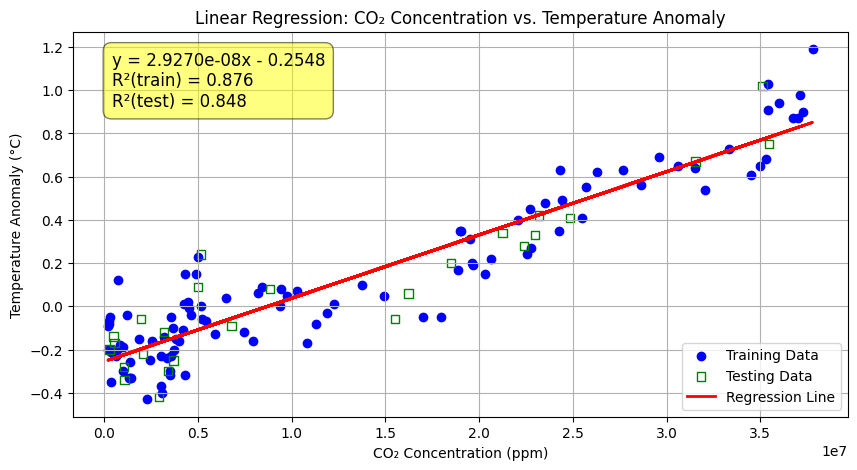

In [ ]:
# Step 1: Preprocess Data
# Convert emissions from Mt to Gt for consistency
merged_df.rename(columns={"Annual CO‚ÇÇ emissions": "Annual_CO2_Emissions_Gt"}, inplace=True)
merged_df["Annual_CO2_Emissions_Gt"] /= 1e3  # Convert megatonnes (Mt) to gigatonnes (Gt)

# Extract relevant columns
X = merged_df[["Annual_CO2_Emissions_Gt"]].values.reshape(-1, 1)  # Independent variable
y = merged_df["Anomaly"].values  # Dependent variable

# Step 2: Perform Linear Regression
# Split the data into training and testing subset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict y values
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Calculate R¬≤ score
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

# Step 3: Interpret Regression Results
# Extract slope (coefficient) and intercept
slope = model.coef_[0]
intercept = model.intercept_

# Print regression equation
regression_equation = f"Temperature Anomaly (¬∞C) = {slope:.4e} * Anthropogenic CO‚ÇÇ Emissions (Gt) {'+' if intercept >=0 else '-'} {abs(intercept):.4f}"
print("Regression Equation:", regression_equation)

# Print R¬≤ scores
print(f"R¬≤ Score (Training Set) : {r2_train:.3f}")
print(f"R¬≤ Score (Testing Set) : {r2_test:.3f}")

# Step 4: Visualize Regression Results

plt.figure(figsize=(10, 5))
plt.scatter(X_train, y_train, color="blue", label="Training Data")
plt.scatter(X_test, y_test, marker='s', facecolors='none', edgecolors='green', label="Testing Data")
plt.plot(X_train, y_pred_train, color="red", linewidth=2, label="Regression Line")
plt.xlabel("CO‚ÇÇ Concentration (ppm)")
plt.ylabel("Temperature Anomaly (¬∞C)")
plt.title("Linear Regression: CO‚ÇÇ Concentration vs. Temperature Anomaly")
plt.legend(loc='lower right')
plt.grid(True)

# Display regression equation and R¬≤ value on the plot
equation_text = f"y = {slope:.4e}x {'+' if intercept >=0 else '-'} {abs(intercept):.4f}\nR¬≤(train) = {r2_train:.3f}\nR¬≤(test) = {r2_test:.3f}"
plt.annotate(equation_text, xy=(0.05, 0.95), xycoords="axes fraction",
             fontsize=12, ha="left", va="top",
             bbox=dict(boxstyle="round,pad=0.5", fc="yellow", alpha=0.5))

plt.show()

# Linear Regression Model using CO‚ÇÇ Concentration

Regression Equation: Temperature Anomaly (¬∞C) = 0.0096 * CO‚ÇÇ Concentration (ppm) - 3.0286
R¬≤ Score (Training Set) : 0.900
R¬≤ Score (Testing Set) : 0.887


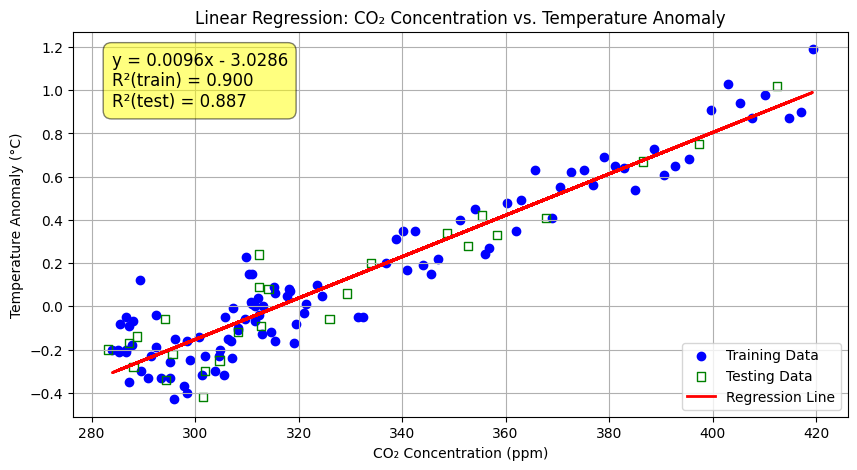

In [ ]:
# Step 1: Preprocess Data
# Extract relevant columns
X = merged_df[["Long-run CO‚ÇÇ concentration"]].values.reshape(-1, 1)  # Independent variable
y = merged_df["Anomaly"].values  # Dependent variable

# Step 2: Perform Linear Regression
# Split the data into training and testing subset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict y values
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Calculate R¬≤ score
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

# Step 3: Interpret Regression Results
# Extract slope (coefficient) and intercept
slope = model.coef_[0]
intercept = model.intercept_

# Print regression equation
regression_equation = f"Temperature Anomaly (¬∞C) = {slope:.4f} * CO‚ÇÇ Concentration (ppm) {'+' if intercept >=0 else '-'} {abs(intercept):.4f}"
print("Regression Equation:", regression_equation)

# Print R¬≤ scores
print(f"R¬≤ Score (Training Set) : {r2_train:.3f}")
print(f"R¬≤ Score (Testing Set) : {r2_test:.3f}")

# Step 4: Visualize Regression Results

plt.figure(figsize=(10, 5))
plt.scatter(X_train, y_train, color="blue", label="Training Data")
plt.scatter(X_test, y_test, marker='s', facecolors='none', edgecolors='green', label="Testing Data")
plt.plot(X_train, y_pred_train, color="red", linewidth=2, label="Regression Line")
plt.xlabel("CO‚ÇÇ Concentration (ppm)")
plt.ylabel("Temperature Anomaly (¬∞C)")
plt.title("Linear Regression: CO‚ÇÇ Concentration vs. Temperature Anomaly")
plt.legend(loc='lower right')
plt.grid(True)

# Display regression equation and R¬≤ value on the plot
equation_text = f"y = {slope:.4f}x {'+' if intercept >=0 else '-'} {abs(intercept):.4f}\nR¬≤(train) = {r2_train:.3f}\nR¬≤(test) = {r2_test:.3f}"
plt.annotate(equation_text, xy=(0.05, 0.95), xycoords="axes fraction",
             fontsize=12, ha="left", va="top",
             bbox=dict(boxstyle="round,pad=0.5", fc="yellow", alpha=0.5))

plt.show()

# Polynomial Regression Model using only Anthropogenic CO‚ÇÇ Emissions

Polynomial Regression is an extension of Linear Regression, where the relationship between the independent variable (X) and the dependent variable (Y) is modeled as an n-th degree polynomial.

The general formula for Polynomial Regression is:

ùëå
=
ùõΩ
0
+
ùõΩ
1
ùëã
+
ùõΩ
2
ùëã
2
+
ùõΩ
3
ùëã
3
+
.
.
.
+
ùõΩ
ùëõ
ùëã
ùëõ
+
ùúÄ
Y=Œ≤
0
‚Äã
 +Œ≤
1
‚Äã
 X+Œ≤
2
‚Äã
 X
2
 +Œ≤
3
‚Äã
 X
3
 +...+Œ≤
n
‚Äã
 X
n
 +Œµ

Where:

ùëå
Y = Dependent variable (temperature anomaly in our case)

ùëã
X = Independent variable (CO‚ÇÇ emissions in our case)

ùõΩ
0
,
ùõΩ
1
,
.
.
.
,
ùõΩ
ùëõ
Œ≤
0
‚Äã
 ,Œ≤
1
‚Äã
 ,...,Œ≤
n
‚Äã
  = Coefficients that the model learns from the data

ùëõ
n = Degree of the polynomial (determined based on model fit)

ùúÄ
Œµ = Error term (captures unexplained variance)

For example, if we use a 2nd-degree polynomial (quadratic), the equation becomes:


ùëå
=
ùõΩ
0
+
ùõΩ
1
ùëã
+
ùõΩ
2
ùëã
2
+
ùúÄ
Y=Œ≤
0
‚Äã
 +Œ≤
1
‚Äã
 X+Œ≤
2
‚Äã
 X
2
 +Œµ

This equation helps in capturing the curved nature of the temperature anomaly trend instead of assuming a linear relationship.

R¬≤ Score (Training Set), k = 5 : 0.892
R¬≤ Score (Testing Set), k = 5 : 0.868
R¬≤ Score (Training Set), k = 5 : 0.884
R¬≤ Score (Testing Set), k = 5 : 0.883
R¬≤ Score (Training Set), k = 5 : 0.883
R¬≤ Score (Testing Set), k = 5 : 0.905
R¬≤ Score (Training Set), k = 5 : 0.892
R¬≤ Score (Testing Set), k = 5 : 0.865
R¬≤ Score (Training Set), k = 5 : 0.888
R¬≤ Score (Testing Set), k = 5 : 0.874
Average R¬≤ Score (Training Set) : 0.888
Average R¬≤ Score (Testing Set) : 0.879


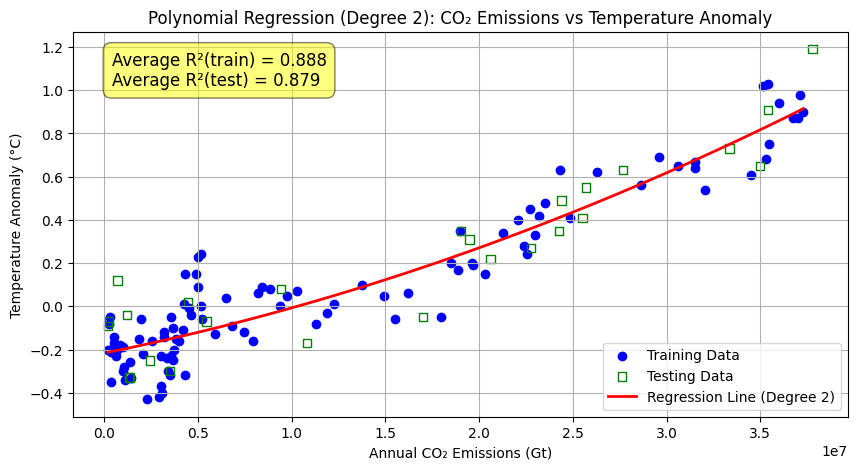

In [ ]:
# Step 1: Preprocess Data
# Extract relevant columns
X = merged_df[["Annual_CO2_Emissions_Gt"]].values.reshape(-1, 1)  # Independent variable
y = merged_df["Anomaly"].values  # Dependent variable

# Step 2: Perform Polynomial Regression (Degree 2) with K-fold validation
# Create KFold cross-validator
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5 folds

# Initialize lists to store results
r2_poly2 = []

# Perform K-fold cross validatoin
for train_index, test_index in kf.split(X):
  # Split the data into training and testing subset
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

  # Initialize and fit the model
  poly2 = PolynomialFeatures(degree=2)
  X_poly2_train = poly2.fit_transform(X_train)
  poly2_model = LinearRegression()
  poly2_model.fit(X_poly2_train, y_train)

  # Predict y values
  y_poly2_pred_train = poly2_model.predict(X_poly2_train)
  X_poly2_test = poly2.transform(X_test)
  y_poly2_pred_test = poly2_model.predict(X_poly2_test)

  # Calculate R¬≤ score
  r2_poly2_train = r2_score(y_train, y_poly2_pred_train)
  r2_poly2_test = r2_score(y_test, y_poly2_pred_test)
  r2_scores = [r2_poly2_train, r2_poly2_test]
  r2_poly2.append(r2_scores)

  # Step 3: Interpret Regression Results
  # Print R¬≤ scores
  print(f"R¬≤ Score (Training Set), k = {kf.get_n_splits()} : {r2_poly2_train:.3f}")
  print(f"R¬≤ Score (Testing Set), k = {kf.get_n_splits()} : {r2_poly2_test:.3f}")

# Calculate and display the average R¬≤ score across all folds
r2_poly2_train_avg = np.mean([r2[0] for r2 in r2_poly2])
r2_poly2_test_avg = np.mean([r2[1] for r2 in r2_poly2])
print(f"Average R¬≤ Score (Training Set) : {r2_poly2_train_avg:.3f}")
print(f"Average R¬≤ Score (Testing Set) : {r2_poly2_test_avg:.3f}")

# Step 4: Visualize Regression Results

# Generate smooth range of X values for plotting the polynomial curve
X_range = np.linspace(min(X_train), max(X_train), 100).reshape(-1, 1)
X_poly_range = poly2.transform(X_range)
y_poly = poly2_model.predict(X_poly_range)

# Scatter plot of actual data points
plt.figure(figsize=(10, 5))
plt.scatter(X_train, y_train, color="blue", label="Training Data")
plt.scatter(X_test, y_test, marker='s', facecolors='none', edgecolors='green', label="Testing Data")
plt.plot(X_range, y_poly, color="red", linewidth=2, label="Regression Line (Degree 2)")
plt.xlabel("Annual CO‚ÇÇ Emissions (Gt)")
plt.ylabel("Temperature Anomaly (¬∞C)")
plt.title("Polynomial Regression (Degree 2): CO‚ÇÇ Emissions vs Temperature Anomaly")
plt.legend(loc='lower right')
plt.grid(True)

# Display regression equation and R¬≤ value on the plot
equation_text = f"Average R¬≤(train) = {r2_poly2_train_avg:.3f}\nAverage R¬≤(test) = {r2_poly2_test_avg:.3f}"
plt.annotate(equation_text, xy=(0.05, 0.95), xycoords="axes fraction",
             fontsize=12, ha="left", va="top",
             bbox=dict(boxstyle="round,pad=0.5", fc="yellow", alpha=0.5))

plt.show()

# Time Series Forecasting (ARIMA) for CO‚ÇÇ Emissions

ARIMA is a time series forecasting model that consists of three components:

AutoRegressive (AR): Uses past values to predict the future.
Integrated (I): Differencing is applied to make the data stationary.
Moving Average (MA): Uses past errors to improve predictions.
The general form of an ARIMA(p, d, q) model is:

ùëå
ùë°
=
ùúô
1
ùëå
ùë°
‚àí
1
+
ùúô
2
ùëå
ùë°
‚àí
2
+
.
.
.
+
ùúô
ùëù
ùëå
ùë°
‚àí
ùëù
+
ùúÉ
1
ùúÄ
ùë°
‚àí
1
+
ùúÉ
2
ùúÄ
ùë°
‚àí
2
+
.
.
.
+
ùúÉ
ùëû
ùúÄ
ùë°
‚àí
ùëû
+
ùê∂
+
ùúÄ
ùë°
Y
t
‚Äã
 =œï
1
‚Äã
 Y
t‚àí1
‚Äã
 +œï
2
‚Äã
 Y
t‚àí2
‚Äã
 +...+œï
p
‚Äã
 Y
t‚àíp
‚Äã
 +Œ∏
1
‚Äã
 Œµ
t‚àí1
‚Äã
 +Œ∏
2
‚Äã
 Œµ
t‚àí2
‚Äã
 +...+Œ∏
q
‚Äã
 Œµ
t‚àíq
‚Äã
 +C+Œµ
t
‚Äã


Where:


ùëå
ùë°
Y
t
‚Äã
  = Value of the time series at time

ùë°
t (temperature anomaly at time
ùë°
t)

ùúô
1
,
ùúô
2
,
.
.
.
,
ùúô
ùëù
œï
1
‚Äã
 ,œï
2
‚Äã
 ,...,œï

p
‚Äã
  = Coefficients for the AutoRegressive (AR) terms

ùëå
ùë°
‚àí
1
,
ùëå
ùë°
‚àí
2
,
.
.
.
,
ùëå
ùë°
‚àí
ùëù
Y
t‚àí1
‚Äã
 ,Y
t‚àí2
‚Äã
 ,...,Y
t‚àíp
‚Äã
  = Past observations

ùúÉ
1
,
ùúÉ
2
,
.
.
.
,
ùúÉ
ùëû
Œ∏
1
‚Äã
 ,Œ∏
2
‚Äã
 ,...,Œ∏

q
‚Äã
  = Coefficients for the Moving Average (MA) terms

ùúÄ
ùë°
Œµ
t
‚Äã
  = Error term (white noise)

ùëù
p = Number of AR terms (lags of

ùëå
ùë°
Y
t
‚Äã
 )
ùëë
d = Number of times the series is differenced to achieve stationarity

ùëû
q = Number of MA terms (lags of the error term)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

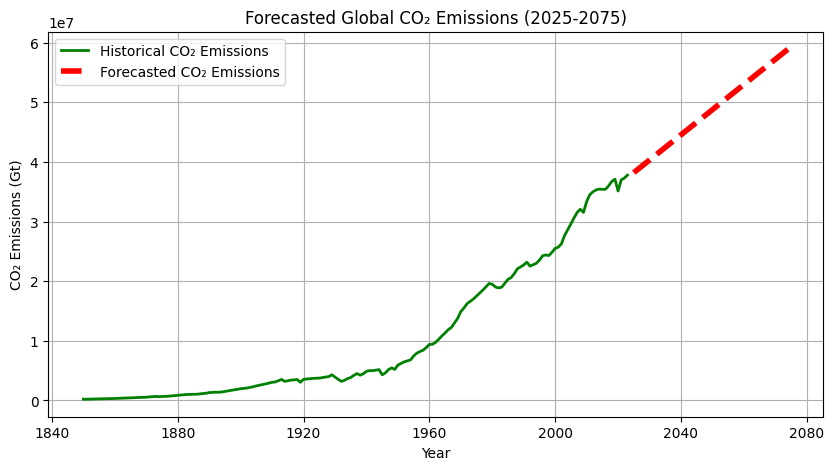

In [ ]:
# Extract CO‚ÇÇ emissions as a time series
co2_emissions_series = merged_df["Annual_CO2_Emissions_Gt"]

# Fit ARIMA model (best order found: (0,2,1))
final_arima_model = ARIMA(co2_emissions_series, order=(0,2,1)).fit()

# Forecast CO‚ÇÇ emissions for the next 50 years (2025-2075)
forecast_years = 50
future_years = pd.date_range(start=co2_emissions_series.index[-1] + pd.DateOffset(years=1), periods=forecast_years, freq='YE')
future_emissions_forecast = final_arima_model.forecast(steps=forecast_years)

# Create DataFrame for forecasted CO‚ÇÇ emissions
future_emissions_df = pd.DataFrame({"Year": future_years, "Predicted_CO2_Emissions": future_emissions_forecast})
future_emissions_df.set_index("Year", inplace=True)

# Plot CO‚ÇÇ Emissions Forecast
plt.figure(figsize=(10, 5))
plt.plot(merged_df.index, merged_df["Annual_CO2_Emissions_Gt"], label="Historical CO‚ÇÇ Emissions", color="green", linewidth=2)
plt.plot(future_emissions_df.index, future_emissions_df["Predicted_CO2_Emissions"], label="Forecasted CO‚ÇÇ Emissions", color="red", linestyle='--',linewidth=4)
plt.xlabel("Year")
plt.ylabel("CO‚ÇÇ Emissions (Gt)")
plt.title("Forecasted Global CO‚ÇÇ Emissions (2025-2075)")
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

# Predict Future Temperature Anomalies

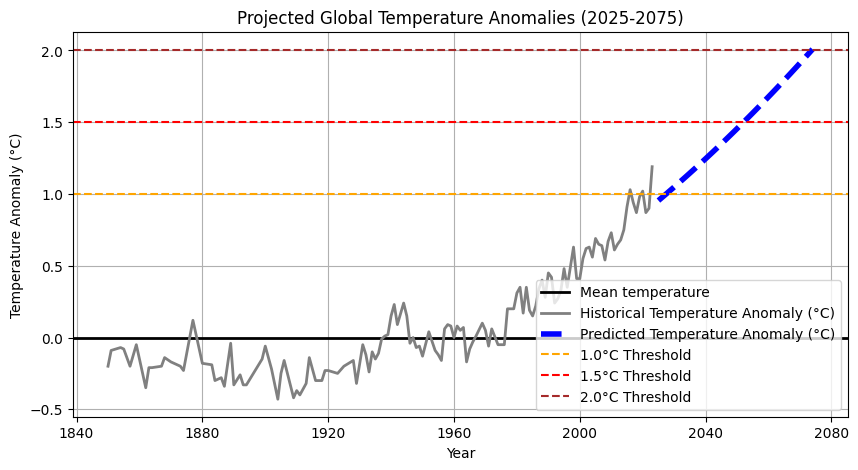

Results:
Global temperature will increase by 1.0¬∞C by Year 2027
Global temperature will increase by 1.5¬∞C by Year 2052
Global temperature will increase by 2.0¬∞C by Year 2073
            Predicted_CO2_Emissions  Poly2_Temperature_Anomaly
Year                                                          
2024-12-31             3.821398e+07                   0.954362
2025-12-31             3.863638e+07                   0.972927
2026-12-31             3.905879e+07                   0.991614
2027-12-31             3.948119e+07                   1.010424
2028-12-31             3.990360e+07                   1.029358
2029-12-31             4.032601e+07                   1.048414
2030-12-31             4.074841e+07                   1.067594
2031-12-31             4.117082e+07                   1.086896
2032-12-31             4.159322e+07                   1.106321
2033-12-31             4.201563e+07                   1.125870


In [ ]:
# Predict Future Temperature Anomalies using Polynomial Regression (Degree 2)
X_future = future_emissions_df[["Predicted_CO2_Emissions"]].values
future_emissions_df["Poly2_Temperature_Anomaly"] = poly2_model.predict(poly2.transform(X_future))

# Compare with IPCC Projections
thresholds = [1.0, 1.5, 2.0]

threshold_years = {}
for threshold in thresholds:
    threshold_years[f"{threshold}¬∞C"] = future_emissions_df[future_emissions_df["Poly2_Temperature_Anomaly"] >= threshold].head(1).index

# Convert results to readable format
for key in threshold_years.keys():
    threshold_years[key] = threshold_years[key][0] if threshold_years[key].size > 0 else "Not reached"

# Plot Temperature Anomaly Forecast
plt.figure(figsize=(10, 5))
plt.axhline(y=0, color='black', linestyle='-',linewidth=2, label='Mean temperature')
plt.plot(merged_df.index, merged_df['Anomaly'], label="Historical Temperature Anomaly (¬∞C)", color="grey", linestyle='-', linewidth=2)
plt.plot(future_emissions_df.index, future_emissions_df["Poly2_Temperature_Anomaly"], label="Predicted Temperature Anomaly (¬∞C)", color="blue", linestyle='--', linewidth=4)
plt.axhline(y=1.0, color='orange', linestyle='--', label="1.0¬∞C Threshold")
plt.axhline(y=1.5, color='red', linestyle='--', label="1.5¬∞C Threshold")
plt.axhline(y=2.0, color='brown', linestyle='--', label="2.0¬∞C Threshold")
plt.xlabel("Year")
plt.ylabel("Temperature Anomaly (¬∞C)")
plt.title("Projected Global Temperature Anomalies (2025-2075)")
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Results
print("Results:")
for key in threshold_years.keys():
    print(f"Global temperature will increase by {key} by Year {threshold_years[key]:%Y}")

print(future_emissions_df.head(10))  # Display first 10 rows
future_emissions_df.to_csv("forecasted_temperature_anomalies.csv", index=True)